In [1]:
# importing dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from ipywidgets import interact, widgets
 

In [2]:
# load csv file
data = pd.read_csv("mlb-standings-and-payroll.csv")

In [3]:
# making sure data loaded properly
data.head()

,tm,year,attendance,attend_per_game,batage,page,bpf,ppf,n_hof,n_aallstars,...,home,road,exinn,1run,vrhp,vlhp,vs_teams_above_500,vs_teams_below_500,inter,last_year
0,ANA,1997,1767330,21553,29.7,28.3,102,102,2,1,...,46-36,38-42,5-8,27-25,66-55,18-23,23-34,61-44,4-12,1996
1,ANA,1998,2519280,31102,28.7,29.8,102,102,0,2,...,42-39,43-38,6-6,24-19,62-59,23-18,30-36,55-41,10-6,1997
2,ANA,1999,2253123,27816,28.8,31.5,99,99,0,1,...,37-44,33-48,4-8,23-25,51-73,19-19,27-45,43-47,6-12,1998
3,ANA,2000,2066982,25518,27.7,28.9,102,102,0,2,...,46-35,36-45,9-7,32-23,61-55,21-25,42-49,40-31,12-6,1999
4,ANA,2001,2000919,24703,28.0,28.9,101,100,0,2,...,39-42,36-45,7-8,24-24,53-60,22-27,37-55,38-32,10-8,2000


In [4]:
#creating data frame & selecting only columns needed
df = pd.DataFrame(data)
filtered_df = df.loc[:, ['tm', 'year' ,'est_payroll']]
filtered_df.head()

,tm,year,est_payroll
0,ANA,1997,31135472.0
1,ANA,1998,41791000.0
2,ANA,1999,55633166.0
3,ANA,2000,52664167.0
4,ANA,2001,47735167.0


In [5]:
#getting unique team names
teams = filtered_df['tm'].unique()
teams

array(['ANA', 'ARI', 'ATL', 'BAL', 'BOS', 'BRO', 'BSN', 'CAL', 'CHC',
       'CHW', 'CIN', 'CLE', 'COL', 'DET', 'FLA', 'HOU', 'KCA', 'KCR',
       'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'MLN', 'MON', 'NYG', 'NYM',
       'NYY', 'OAK', 'PHA', 'PHI', 'PIT', 'SDP', 'SEA', 'SEP', 'SFG',
       'SLB', 'STL', 'TBD', 'TBR', 'TEX', 'TOR', 'WSA', 'WSH', 'WSN'],
      dtype=object)

In [6]:
#excluding certain teams
dont_want = ['ANA', 'BRO', 'BSN', 'CAL', 'FLA', 'KCA', 'MLN', 'MON', 'NYG', 'PHA', 'SEP', 'SLB', 'TBD', 'WSA', 'WSH']

In [7]:
filtered_df.dtypes

tm              object
year             int64
est_payroll    float64
dtype: object

In [8]:
filtered_df['est_payroll'].fillna(0, inplace=True)
filtered_df['est_payroll'] = filtered_df['est_payroll'].astype(int)

In [9]:
filtered_df['est_payroll'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        31135472
1        41791000
2        55633166
3        52664167
4        47735167
          ...    
1587     67701000
1588     68492928
1589     92386000
1590    112493250
1591    137235080
Name: est_payroll, Length: 1592, dtype: int64>

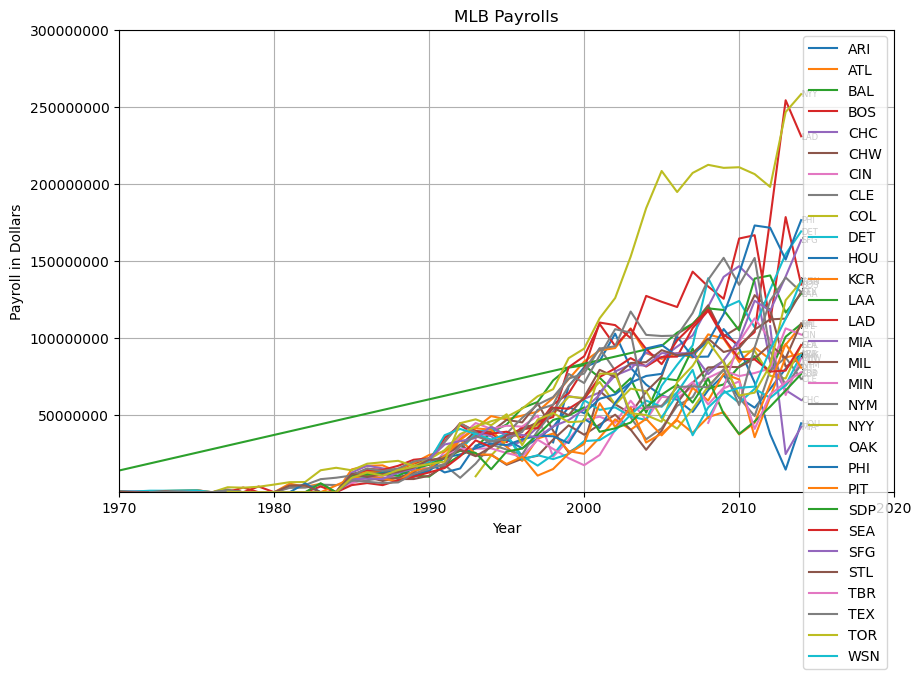

In [10]:
#creating the line graph
plt.figure(figsize=(10,6))
teams = [team for team in teams if team not in dont_want]
for team in teams:
    team_data = filtered_df[filtered_df['tm'] == team]
    plt.plot(team_data['year'], team_data['est_payroll'], label=team)
    plt.text(team_data['year'].iloc[-1], team_data['est_payroll'].iloc[-1], team, fontsize=6, ha='left', va='center')

plt.ylim(450000,300000000)
plt.xlim(1970,2020)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Payroll in Dollars')
plt.title('MLB Payrolls')
plt.legend()
plt.grid(True)
plt.show()

In [11]:

##Creating widget like we used to linear regression
def plot_team_financials(team):
    
    plt.figure(figsize=(10,6))

    team_data = filtered_df[filtered_df['tm'] == team]
    plt.plot(team_data['year'], team_data['est_payroll'], label=team)
    plt.text(team_data['year'].iloc[-1], team_data['est_payroll'].iloc[-1], team, fontsize=6, ha='left', va='center')

    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel('Year')
    plt.ylabel('Est. Payroll')
    plt.title('Team Financials')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create a dropdown menu to select a team
team_dropdown = widgets.Dropdown(
    options=teams,
    description='Team:',
    disabled=False,
)


interact(plot_team_financials, team=team_dropdown);


interactive(children=(Dropdown(description='Team:', options=('ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', …